In [1]:
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#DATA VISUALIZATION

In [3]:
IMAGE_SIZE=256
BATCH_SIZE=32
CHANNEL=3
EPOCHS=50

In [4]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "plant",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 3000 files belonging to 3 classes.


In [5]:
class_name=dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [6]:
len(dataset)

94

(32, 256, 256, 3)
[1 0 2 0 1 2 1 1 1 0 2 0 0 2 0 1 1 2 1 0 0 0 0 1 2 2 0 2 0 2 2 1]


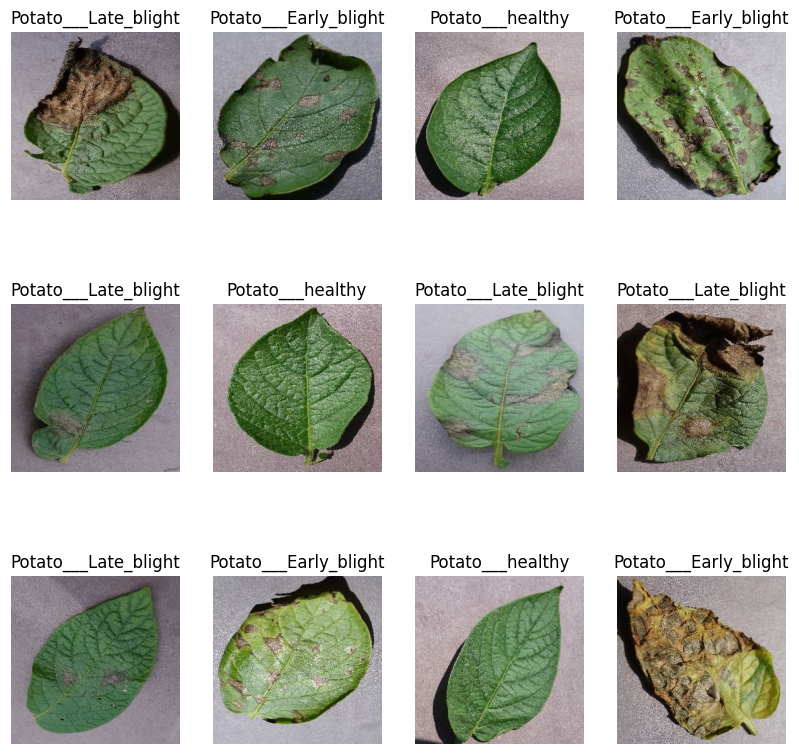

In [7]:
plt.figure(figsize=(10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())
    for i in range(12):
        ax=plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt .title(class_name[label_batch[i]])
        plt.axis("off")
        
        

In [8]:
#SPLIT DATASET INTO TRAINING TEST AND VALIDATION
#80%==training
#20%=test
    #10%==test
    #10%==validation

In [9]:
train_size = 0.8
len(dataset)*train_size

75.2

In [10]:
train_ds=dataset.take(54)
len(train_ds)

54

In [11]:
test_ds=dataset.skip(54)
len(test_ds)

40

In [12]:
val_size=0.1
len(dataset)*val_size

9.4

In [13]:
val_ds=test_ds.take(54)
len(val_ds)

40

In [14]:
test_ds=test_ds.skip(6)
len(test_ds)

34

In [15]:
#DATA AUGMENTATION

In [16]:
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds=test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds=val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [17]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy()/255)

[[[0.49019608 0.47843137 0.5137255 ]
  [0.4745098  0.4627451  0.49803922]
  [0.4745098  0.4627451  0.49803922]
  ...
  [0.67058825 0.6666667  0.69803923]
  [0.6784314  0.6745098  0.7058824 ]
  [0.6901961  0.6862745  0.7176471 ]]

 [[0.49803922 0.4862745  0.52156866]
  [0.47843137 0.46666667 0.5019608 ]
  [0.45882353 0.44705883 0.48235294]
  ...
  [0.68235296 0.6784314  0.70980394]
  [0.6784314  0.6745098  0.7058824 ]
  [0.6862745  0.68235296 0.7137255 ]]

 [[0.53333336 0.52156866 0.5568628 ]
  [0.5529412  0.5411765  0.5764706 ]
  [0.5529412  0.5411765  0.5764706 ]
  ...
  [0.7019608  0.69803923 0.7294118 ]
  [0.69411767 0.6901961  0.72156864]
  [0.6901961  0.6862745  0.7176471 ]]

 ...

 [[0.5176471  0.50980395 0.56078434]
  [0.5372549  0.5294118  0.5803922 ]
  [0.4        0.39215687 0.44313726]
  ...
  [0.5882353  0.59607846 0.64705884]
  [0.59607846 0.6039216  0.654902  ]
  [0.6        0.60784316 0.65882355]]

 [[0.5568628  0.54901963 0.6       ]
  [0.5411765  0.53333336 0.58431375]


In [18]:
resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)

])

In [19]:
from tensorflow.keras.layers import RandomFlip, RandomRotation

data_augmentation = tf.keras.Sequential([
    RandomFlip("horizontal_and_vertical"),
    RandomRotation(0.2),
])


In [20]:
#Creating CNN model

In [21]:

n_classes=3
model=models.Sequential([
    layers.Input(shape=(IMAGE_SIZE, IMAGE_SIZE, CHANNEL)),
    data_augmentation,
    resize_and_rescale,
    
    layers.Conv2D(32,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(256,(3,3),padding='valid',strides=(1,1),activation='relu'),
    layers.MaxPooling2D((2,2)),
    #layers.Conv2D(64,(3,3),activation='relu'),
    #layers.MaxPooling2D((2,2)),
    #layers.Conv2D(64,(3,3),activation='relu'),
    #layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(256,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
])



model.summary()
    
    

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)            │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential (Sequential)              │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 50176)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      12,845,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,234,499 (50.49 MB)

 Trainable params: 13,234,499 (50.49 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
from tensorflow.keras.optimizers import Nadam

optimizer = Nadam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [23]:
import time

start = time.time()

# Fit the model
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=EPOCHS
)

# Print the total training time
print("Total time: ", time.time() - start, "seconds")


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 85s 1s/step - accuracy: 0.4408 - loss: 1.2768 - val_accuracy: 0.6305 - val_loss: 1.0506
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 75s 1s/step - accuracy: 0.8367 - loss: 0.4086 - val_accuracy: 0.8876 - val_loss: 0.3138
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 64s 1s/step - accuracy: 0.9209 - loss: 0.2129 - val_accuracy: 0.9167 - val_loss: 0.2061
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9309 - loss: 0.1953 - val_accuracy: 0.9308 - val_loss: 0.1735
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9588 - loss: 0.1189 - val_accuracy: 0.9520 - val_loss: 0.1327
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 63s 1s/step - accuracy: 0.9693 - loss: 0.0937 - val_accuracy: 0.8947 - val_loss: 0.2699
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 69s 1s/step - accuracy: 0.9467 - loss: 0.1366 - val_accuracy: 0.9607 - val_loss: 0.1183
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 62s 1s/step - accuracy: 0.9615 - loss: 0.1103 - val_accuracy: 0.8703 - val_loss:

In [24]:
scores=model.evaluate(test_ds)


34/34 ━━━━━━━━━━━━━━━━━━━━ 11s 205ms/step - accuracy: 0.9815 - loss: 0.0436


In [25]:
scores

[0.03471728414297104, 0.9833333492279053]

In [26]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [28]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

Text(0.5, 1.0, 'traning and validation accuracy')

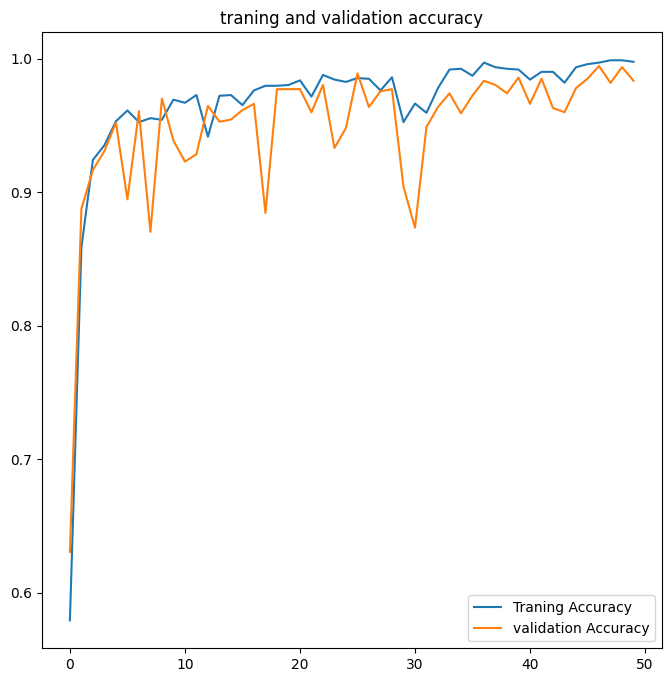

In [29]:
plt.figure(figsize=(8,8))
#plt.subplot(1,2,1)
plt.plot(range(EPOCHS),acc,label='Traning Accuracy')
plt.plot(range(EPOCHS),val_acc,label='validation Accuracy')
plt.legend(loc='lower right')
plt.title('traning and validation accuracy')



Text(0.5, 1.0, 'traning and validation loss')

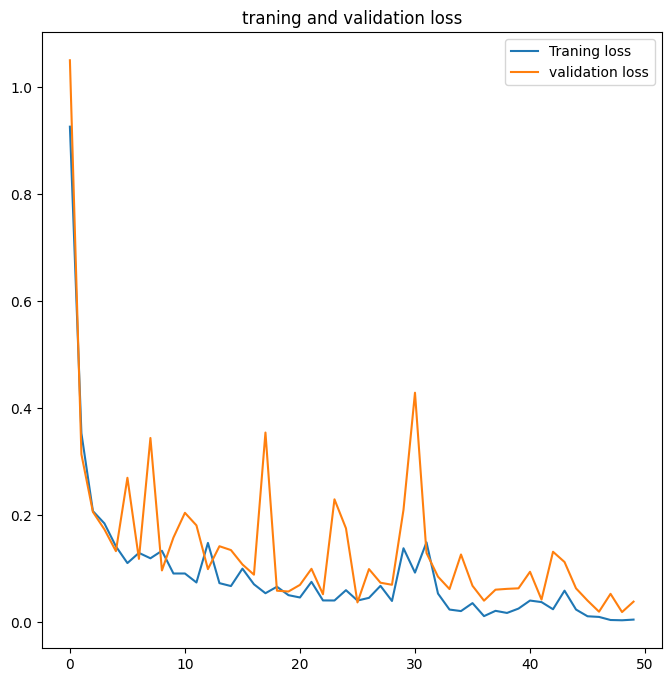

In [30]:
plt.figure(figsize=(8,8))
#plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label='Traning loss')
plt.plot(range(EPOCHS),val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('traning and validation loss')


In [31]:
from sklearn.metrics import classification_report, confusion_matrix

# Initialize lists to collect predictions and true labels
y_pred_classes = []
true_labels = []

# Loop through the test dataset
for batch in test_ds:
    # Assuming batch contains both images and labels
    images, labels = batch
    predictions = model.predict(images)
    y_pred_classes.extend([np.argmax(element) for element in predictions])
    true_labels.extend(labels.numpy().tolist())  # Convert tensor to list

# Print lengths to ensure they match
print("Number of predictions:", len(y_pred_classes))
print("Number of true labels:", len(true_labels))

# Classification report
print('Classification report:\n', classification_report(true_labels, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(true_labels, y_pred_classes)
print('Confusion Matrix:\n', conf_matrix)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 723ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 278ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 264ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 254ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 326ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 367ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 242ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 243ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 229ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 234ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

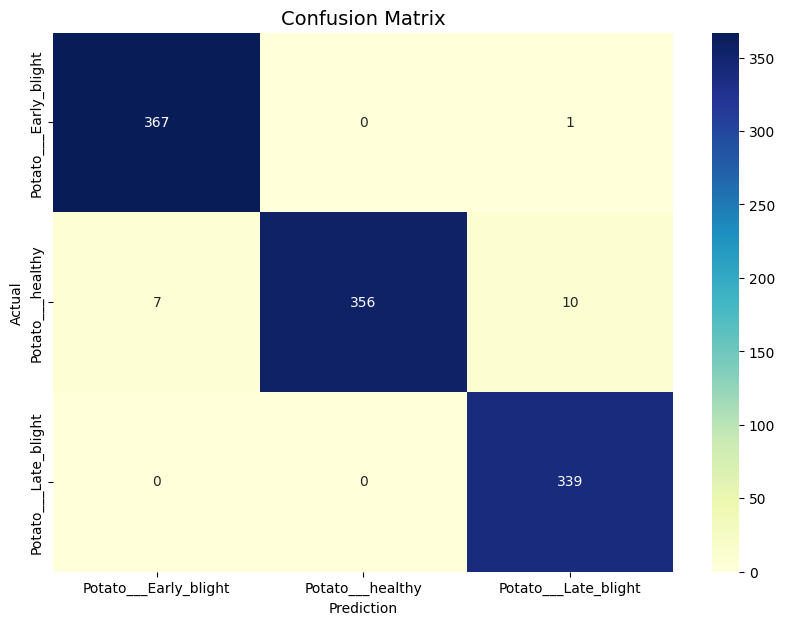

In [32]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Initialize lists to store predictions and true labels
y_pred_classes = []
true_labels = []

# Assuming test_ds is your test dataset
for batch in test_ds:
    images, labels = batch  # Assuming each batch contains (images, labels)
    predictions = model.predict(images)  # Make predictions
    y_pred_classes.extend(np.argmax(predictions, axis=1))  # Get predicted classes
    true_labels.extend(labels.numpy())  # Get true labels

# Convert to numpy arrays for easier handling
y_pred_classes = np.array(y_pred_classes)
true_labels = np.array(true_labels)

# Print lengths to verify
print("Number of predictions:", len(y_pred_classes))
print("Number of true labels:", len(true_labels))

# Compute the confusion matrix
cm = confusion_matrix(true_labels, y_pred_classes)

# Print the confusion matrix
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='YlGnBu',
            xticklabels=['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight'], 
            yticklabels=['Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight'])

plt.ylabel('Actual', fontsize=10)
plt.xlabel('Prediction', fontsize=10)
plt.title('Confusion Matrix', fontsize=14)
plt.show()


Actual Label: Potato___Late_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 370ms/step
Predicted Label: Potato___Late_blight
Confidence Value: 99.87276196479797


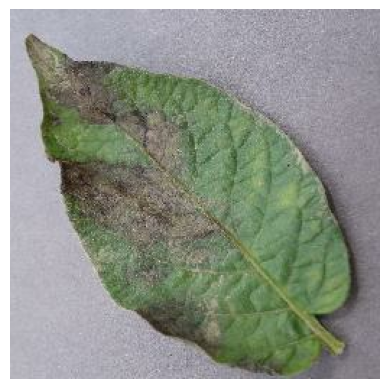

In [33]:
for images_batch, labels_batch in test_ds.take(1):
    first_image = images_batch[0].numpy().astype("uint8")
    #print("First image to predict")
    plt.imshow(first_image)
    plt.axis('off')  # Turn off axes for better visuals
    
    print("Actual Label:",class_name[labels_batch[0].numpy()])
    batch_prediction = model.predict(images_batch)
    print("Predicted Label:",class_name[np.argmax(batch_prediction[0])])
    confidence = np.max(batch_prediction[0])  # Confidence value
    print("Confidence Value:",format(confidence * 100))